In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


 Let's start with simple dataset 

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([[0, 0, 0, 1, 1, 1]]).T #(m,)



### Define Sigmoid Function  ans Cost Function 

There is convinent function that we use for Logistic Regression is called Sigmoid :
$$ \begin{equation*}
g(z) = \frac{1}{1+ e^{-z}}
\end{equation*} 
$$

In [3]:
def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    return sig

In [4]:
# Cost function 
def cost(x,y):
    m = x.shape[0]
    loss = -y*np.log(sigmoid(x)) - (1-y)*np.log(1-sigmoid(x))
    cost = (1/m)*np.sum(loss)
    return cost
    

### Gradient Descent

<!-- <img align="right" src="./images/C1_W3_Logistic_gradient_descent.png"     style=" width:400px; padding: 10px; " > -->

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


In [5]:
def gradient_descent(x, y,n_iter, learning_rate):
    
    num_obs = x.shape[0]    # numri i observimeve
    num_feature = x.shape[1]    # numri  i parametrave
    w = np.ones(( num_feature,1)) # koeficentet qe duhen te permisiohen gjate iterimeve
    b = 0
    
    error_hist = []
    for i in range(n_iter):
        
        z = np.dot(x,w) +b
#         print(z.shape)
        g = sigmoid(z)
        
        
        
        dcost_dw =  np.sum(np.dot(x.T,g-y))
        dcost_db = np.sum(g-y) 
        
#         print('shape of dcost_dw: ',  dcost_dw.shape)
#         print('shape of dcost_db: ',  dcost_db.shape)
         

        w = w - (learning_rate/num_obs)*dcost_dw
        b = b - (learning_rate/num_obs)*np.sum(g-y)
        
        error_hist.append(cost(g,y))
        
        if(i%(n_iter/10)==0):
            print('cost after ', i, 'iteration is: ', cost(sigmoid(z), y))
    print()
    
#     print('Shape of (g-y): ', (g-y).shape, ', x shape:', x.shape, ', z shape:', z.shape, ', g shape:', g.shape) 
    
    print()
    
    df = pd.DataFrame({'results':sigmoid(z).flatten().round(2),'predictions ': sigmoid(z).flatten().round(0), 'target': y_train.flatten()})
    
    
    plt.plot(error_hist)
    plt.title('learning curve')
    
    sigmoid(z)
    print(df)
    
    print()

    return w, b, error_hist 
        

In [6]:
learning_rate = 0.05
n_iter = 10000


cost after  0 iteration is:  0.773868183566613
cost after  1000 iteration is:  0.5977036766578802
cost after  2000 iteration is:  0.559952223170194
cost after  3000 iteration is:  0.5431261542456407
cost after  4000 iteration is:  0.533826895289738
cost after  5000 iteration is:  0.5279793243808446
cost after  6000 iteration is:  0.523979443035265
cost after  7000 iteration is:  0.5210777515752666
cost after  8000 iteration is:  0.5188796660154615
cost after  9000 iteration is:  0.5171585105119302


   results  predictions   target
0     0.04           0.0       0
1     0.04           0.0       0
2     0.04           0.0       0
3     0.97           1.0       1
4     1.00           1.0       1
5     0.97           1.0       1

[[4.42796315]
 [4.42796315]] -12.100256029582079


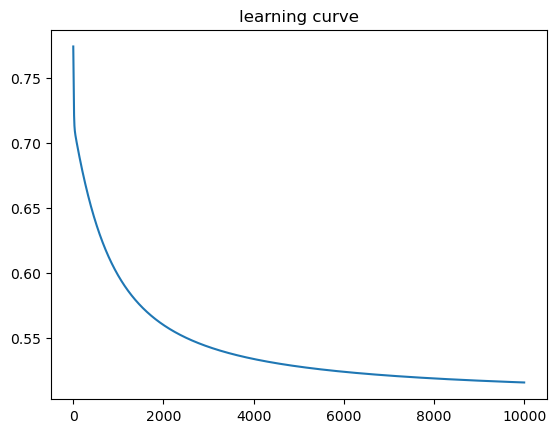

In [7]:
w, b, error = gradient_descent(X_train, y_train, n_iter, learning_rate)
print(w, b)

### Plotting  categories of datasets and Decision Boundery 

Text(0, 0.5, 'x2')

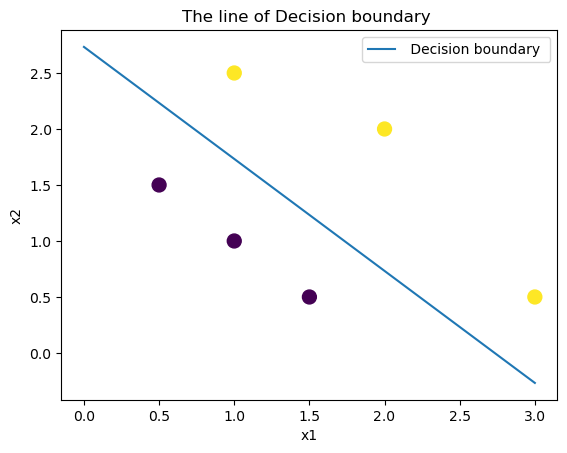

In [8]:
x1 = np.arange(0,4)
plt.plot(x1, -b/w[0] - x1, label=' Decision boundary ') # this is from equation w1*x1 + w2*x2 + b = 0 or z = np.dot(x,w) + b =0, decision boundery
plt.scatter(X_train[:,:1], X_train[:,1:], c = y_train, s=100)
plt.legend()
plt.title('The line of Decision boundary ')
plt.xlabel('x1')
plt.ylabel('x2')

In [54]:
X_train[:, :1

array([[0.5],
       [1. ],
       [1.5],
       [3. ],
       [2. ],
       [1. ]])